# Audio File Conversion


In [19]:
# Import Systems 
import struct
import io
import os
import sys
import time
import math
import platform

# Import Audio
import wave
import pyaudio
import librosa

import numpy as np
import scipy
import scipy.signal as sig
import matplotlib.pyplot as plt
import soundfile

# User Libraries
import pyOssWavfile
import pyRoomAcoustic as room
import pyOssDebug as dbg
import pyOssFilter


frames = 1003200
float32
Audio Format = 1
Number of Channel = 2
Sampling Frequency = 48000
Byte Rate = 288000
Block Align = 6
Bits per Sample = 24
1003200
20.9


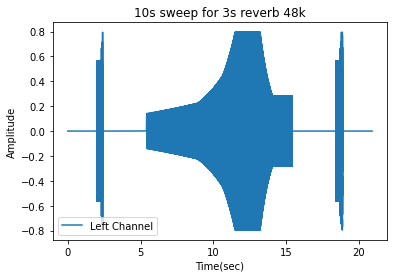

1056000
22.0


In [22]:
# .wav File Open

#############################################################################
#  Impulse Data Load -------------------------------------------------------#
#############################################################################

impulse_dir = os.path.join(os.getcwd(), 'impulsefiles')     # Path of audiofiles folder

# IMPULSE WAVE FILE
# wav_fname_impulse = "TyndallBruceMonument"
# wav_fname_impulse = "ElvedenHallMarbleHall'"
# wav_fname_impulse = "EmptyApartmentBedroom"
# wav_fname_impulse = "FalklandPalaceRoyalTennisCourt"
# wav_fname_impulse = "InsidePiano"
# wav_fname_impulse = "MaesHowe"
# wav_fname_impulse = "SportsCentreUniversityOfYork"
# wav_fname_impulse = "StairwayUniversityOfYork"
# wav_fname_impulse = "StAndrewsChurch"
# wav_fname_impulse = "mh3_000_ortf_48k"
# wav_fname_impulse = "mh3_000_wx_48k"
# wav_fname_impulse = "anechoic_gunshot_0"
wav_fname_impulse = "10s sweep for 3s reverb 48k"


impulse_fname = os.path.join(impulse_dir, wav_fname_impulse + '.wav')  #path + filename

impulse_fmt_chunk = pyOssWavfile.read_format(impulse_fname)
impulse_struct_fmt = pyOssWavfile.extractWavFmtChunk(impulse_fmt_chunk)

if impulse_struct_fmt.bitdepth == 24:        # Bitdepth가 24bit일 때는 pysoundfile을 이용하여 wav data를 불러옴
    impulse_data, impulse_struct_fmt.fs = soundfile.read(impulse_fname, dtype='int32')
else:                                       # 그 외에는 scipy.io.wavfile을 수정한 함수 pyOssWavfile을 이용하여 wav data를 불러옴
    impulse_fmt_chunk, impulse_data, impulse_length = pyOssWavfile.read(impulse_fname)

# Type Conversion
if impulse_data.dtype == 'int16':
    impulse_data = np.float32(impulse_data/(2**15-1))
elif impulse_data.dtype == 'int32':
    impulse_data = np.float32(impulse_data/(2**31-1))

impulse_time = impulse_data.shape[0] / impulse_struct_fmt.fs

impulse_data_L = impulse_data[:,0]

print(impulse_data_L.dtype)
dbg.dWavInfo(impulse_fname)
print(impulse_data_L.shape[0])
print(impulse_data_L.shape[0]/impulse_struct_fmt.fs)
dbg.dPlotAudio(impulse_struct_fmt.fs, impulse_data_L, wav_fname_impulse, "Left Channel", "Time(sec)", "Amplitude")

insert_data = np.zeros(np.int32(1.1 * impulse_struct_fmt.fs))
fixed_data = np.append(impulse_data_L, insert_data )

print(fixed_data.shape[0])
print(fixed_data.shape[0]/impulse_struct_fmt.fs)



In [23]:
convert_fs = 44100
convert_data = librosa.resample(fixed_data, impulse_struct_fmt.fs, convert_fs)


970200
22.0


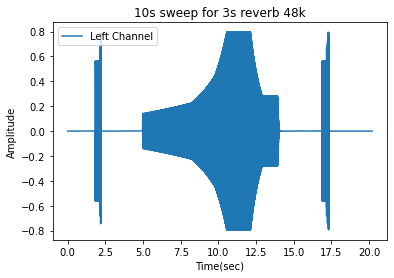

In [24]:
print(convert_data.shape[0])
print(convert_data.shape[0]/convert_fs)

dbg.dPlotAudio(impulse_struct_fmt.fs, convert_data, wav_fname_impulse, "Left Channel", "Time(sec)", "Amplitude")


In [25]:
pyOssWavfile.write(os.path.join(impulse_dir, wav_fname_impulse +'.44.1kHz.f32.wav'), convert_fs, np.float32(convert_data) )

Audio Format = 3
Number of Channel = 1
Sampling Frequency = 44100
Byte Rate = 176400
Block Align = 4
Bits per Sample = 32


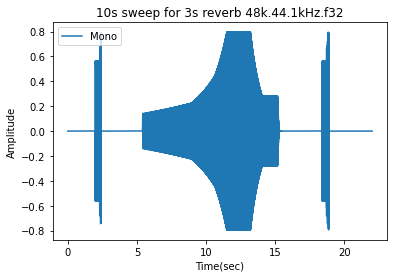

In [26]:
wav_fname_impulse = "10s sweep for 3s reverb 48k.44.1kHz.f32"
fname = os.path.join(impulse_dir, wav_fname_impulse + '.wav')  #path + filename

fmt_chunk, data, length = pyOssWavfile.read(fname)
struct_fmt = pyOssWavfile.extractWavFmtChunk(fmt_chunk)
dbg.dWavInfo(fname)

dbg.dPlotAudio(struct_fmt.fs, data, wav_fname_impulse, "Mono", "Time(sec)", "Amplitude")